In [22]:
import pandas as pd
import matplotlib.pyplot as plt
#specifing the file path
file_path="C:/Users/Ajira/Desktop/SAM WEST.xlsx"
df=pd.read_excel(file_path)
df.head()
print(df.head())

                         Description          Sales Rep   Jan  Feb  March  \
0             META CLEAR SOAP 10*1KG  ANDEO: 0748411097  86.0    0    0.0   
1                    XRAHA NGANO 2KG  ANDEO: 0748411097  96.0  131   70.0   
2  SUNLIGHT POWDER 25/30G (Lavender)  ANDEO: 0748411097  67.0   72  133.0   
3                       KAYSALT 200G  ANDEO: 0748411097 -17.0   47   56.0   
4          JUO DRINK ORANGE 12*300ML  ANDEO: 0748411097   5.0    5    8.0   

   April  May  June   July    Aug   Sep  
0    226  204     0    NaN  130.0  20.0  
1     30    0     0    NaN    0.0   0.0  
2     84   60   108   24.0  136.0  12.0  
3     99  396   405  733.0  600.0   7.0  
4      6    6     3    NaN    5.0   0.0  


Employee Performance (Total Quantities Sold):
                                   Jan     Feb      March   April     May  \
Sales Rep                                                                   
MARIA: 0704190464             180814.0  150281  150911.00  188569  197242   
GLADYS OPIYO: 0727655415      133847.5  119794  121231.00  150818  169438   
KEVIN: 0745345763             148205.0  105942  112070.00  119927  133653   
ANN: 0799175921               105203.0  105105  102447.00  119381  124177   
ANDEO: 0748411097              88423.0   81778   87578.78   91902   99539   
JANET: 0748411048             158252.0  111520  142289.00   48621   19325   
HENRY: 0740364478             102555.0   71866   83830.00   97195   92990   
BEN: 0705195549                68107.0   80827   90682.00  102554   90514   
ELIZABETH WAMBUI: 0791728108   66160.0   61653   62708.00   73739   68997   
KIMAITA:0743335308             60042.0   56346   63253.00   64858   70379   

                             

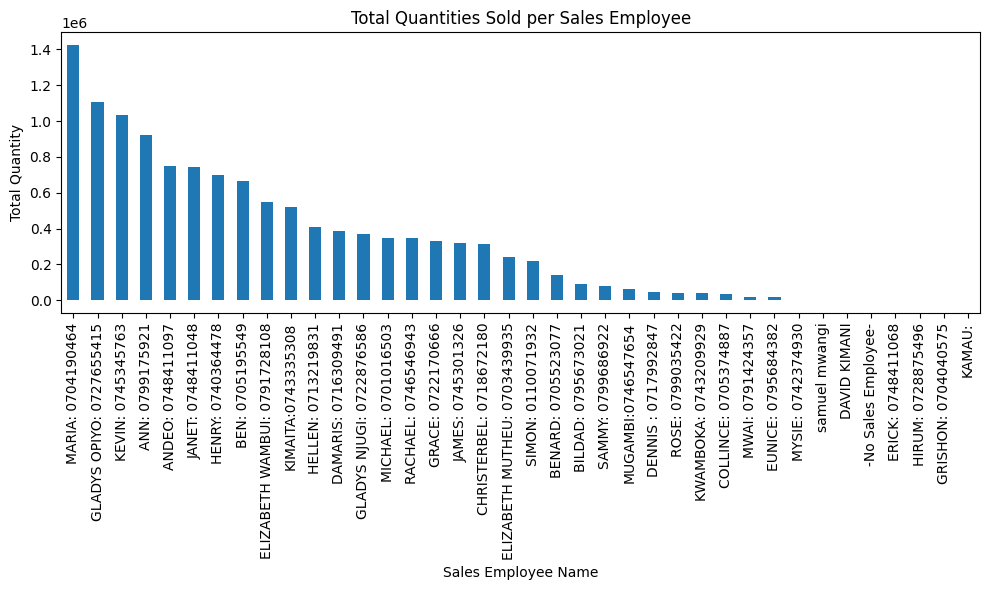

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Sales Rep' and sum the sales for each month
employee_performance = df.groupby('Sales Rep')[['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep']].sum()

# Create a 'Total' column by summing the sales across all months (axis=1 means sum across rows)
employee_performance['Total'] = employee_performance.sum(axis=1)

# Print the top 10 employees based on total sales
print('Employee Performance (Total Quantities Sold):')
print(employee_performance.sort_values('Total', ascending=False).head(10))

# Plot employee performance based on 'Total' sales
plt.figure(figsize=(10, 6))
employee_performance['Total'].sort_values(ascending=False).plot(kind='bar')
plt.title('Total Quantities Sold per Sales Employee')
plt.ylabel('Total Quantity')
plt.xlabel('Sales Employee Name')
plt.tight_layout()
plt.show()




Monthly Trends (Total Quantities Sold per Month):
Jan      1424739.50
Feb      1204623.00
March    1343631.86
April    1554285.00
May      1685896.00
June     1448100.00
July     1709489.00
Aug      1723377.00
Sep       174965.00
dtype: float64


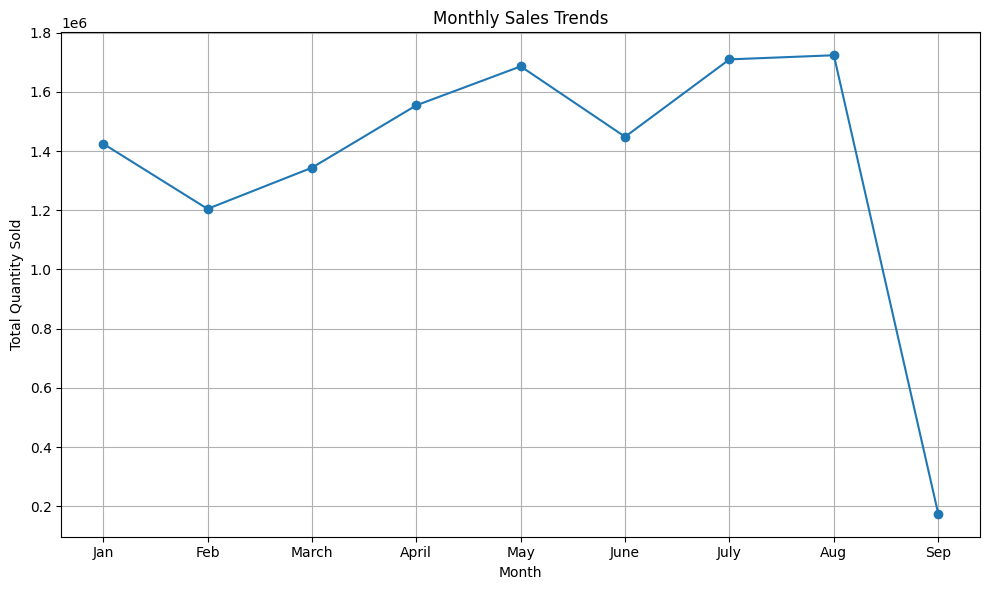

Top 10 Items by Quantity Sold:
Description
AJAB NGANO 2KG                                   321365.0
SOFTCARE GOLD LARGE 40 PCS (HC)                  299522.0
PEMBE UGALI 2 KG                                 266820.0
SUGAR 50KG                                       250893.0
MSAFI WASHING POWDER PURPLE (SATCHET) 12*500G    242332.0
PEMBE NGANO 2 KG                                 239825.0
SOFTCARE GOLD LARGE 8 PCS (LC)                   237113.0
BIRYANI RICE 25KG                                231519.0
KENSALT 2KG                                      230463.0
SOFTCARE GOLD MEDIUM 9 PCS (LC)                  199758.0
Name: Item_Total, dtype: float64


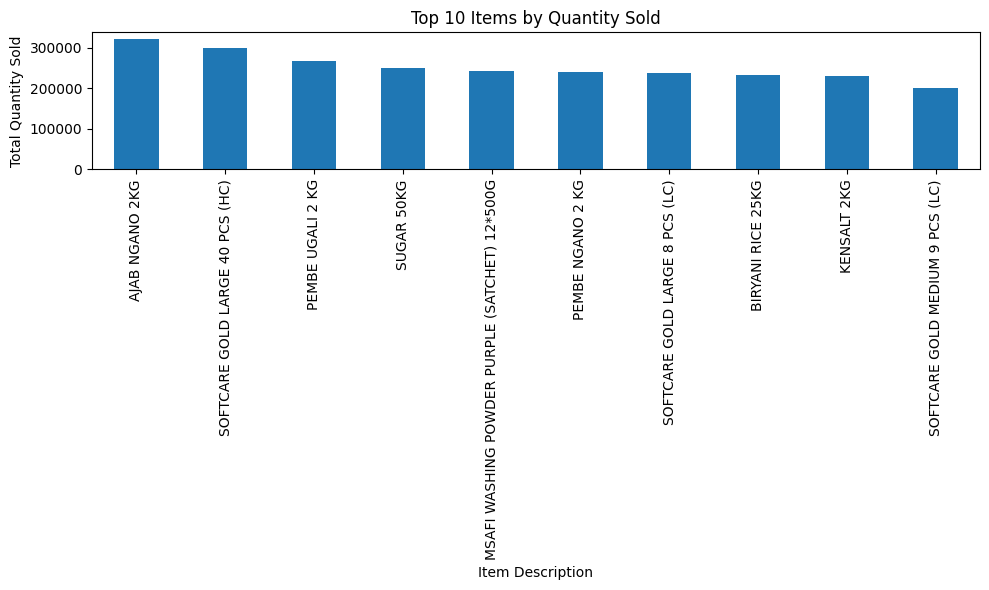

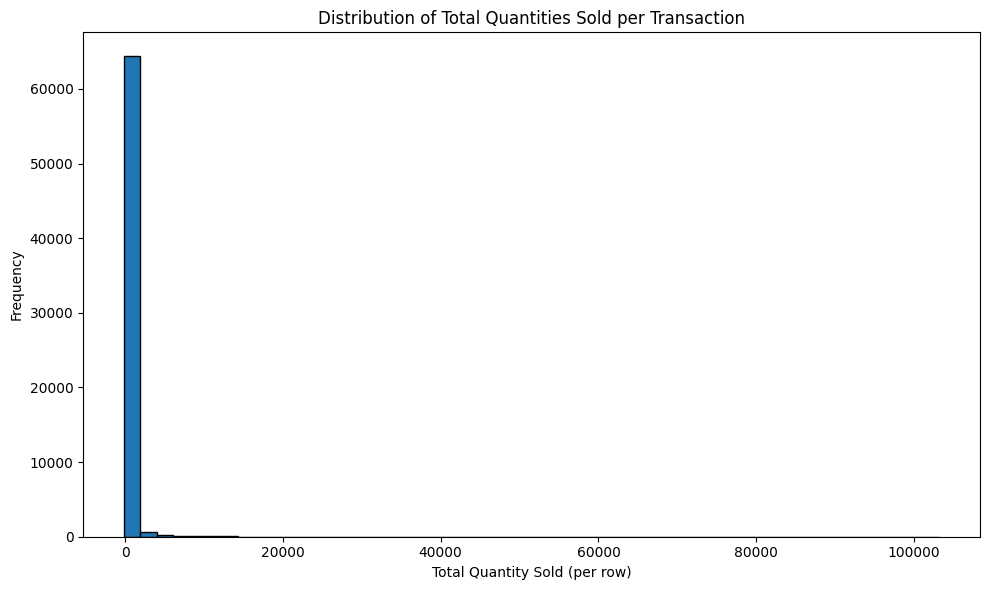

Sample of time series data (monthly quantities per employee):
   Month                Sales Rep  Quantity
0  April      -No Sales Employee-       0.0
1  April        ANDEO: 0748411097   91902.0
2  April          ANN: 0799175921  119381.0
3  April          BEN: 0705195549  102554.0
4  April       BENARD: 0705523077   17817.0
5  April       BILDAD: 0795673021       0.0
6  April  CHRISTERBEL: 0718672180   14480.0
7  April     COLLINCE: 0705374887   11500.0
8  April      DAMARIS: 0716309491   54882.0
9  April             DAVID KIMANI      30.0


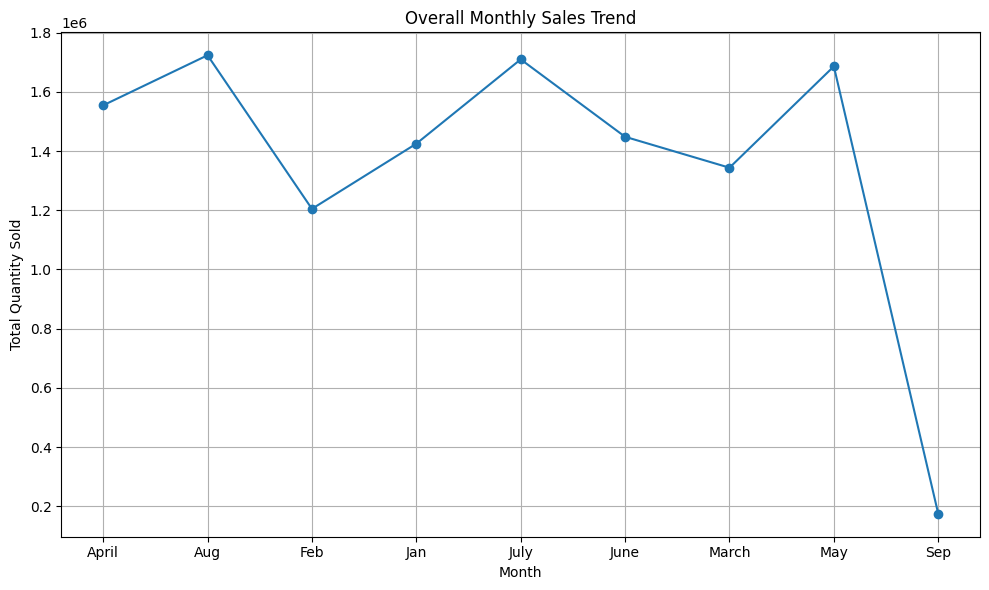

In [24]:
# If these columns are in the dataframe, sum them
month_cols = ['Jan','Feb','March','April','May','June','July','Aug','Sep']
available_month_cols = [col for col in month_cols if col in df.columns]
monthly_trends = df[available_month_cols].sum()
print('Monthly Trends (Total Quantities Sold per Month):')
print(monthly_trends)

# Plot monthly trends
plt.figure(figsize=(10,6))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()
# Sum across all quantity columns for each item
df['Item_Total'] = df[['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep']].sum(axis=1)
item_level = df.groupby('Description')['Item_Total'].sum()
print('Top 10 Items by Quantity Sold:')
print(item_level.sort_values(ascending=False).head(10))

# Plot top 10 items
plt.figure(figsize=(10,6))
item_level.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Items by Quantity Sold')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Item Description')
plt.tight_layout()
plt.show()

# --- 4. Sales Distribution: Distribution of total quantities sold in each transaction (row)
plt.figure(figsize=(10,6))
plt.hist(df['Item_Total'], bins=50, edgecolor='black')
plt.title('Distribution of Total Quantities Sold per Transaction')
plt.xlabel('Total Quantity Sold (per row)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('total_quantity_chart.png', dpi=300)
plt.show()
#We can reshape the data to a long format for months
# This example reshapes data for monthly trends per employee
if available_month_cols:
    ts_df = df[['Sales Rep'] + available_month_cols].copy()
    ts_df = ts_df.melt(id_vars=['Sales Rep'],
                       value_vars=available_month_cols,
                       var_name='Month',
                       value_name='Quantity')
    # Group by month (and sort by month order if needed)
    monthly_employee = ts_df.groupby(['Month','Sales Rep']).sum().reset_index()
    print('Sample of time series data (monthly quantities per employee):')
    print(monthly_employee.head(10))

    # As an example, plot total quantity per month across employees
    monthly_sum = ts_df.groupby('Month').sum()
    plt.figure(figsize=(10,6))
    monthly_sum['Quantity'].plot(kind='line', marker='o')
    plt.title('Overall Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Quantity Sold')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('monthly_sum.png', dpi=300)
    plt.show()
else:
    print('No monthly columns available for time series analysis.')


In [25]:
df.to_csv('analyzed_data.csv', index=False)